# TODO 
(Lets use Honda accord 2018 to specify the basic car features and Yes marina circuit to define the track features except the shape itself)
- Come up with 4 different scenarios
       we can have scenarios of banked track(this might be 
       difficult), if the road is wet, different car specs, making it more realistic......
- Equation for radius using theta(turn), when does centrifugal force applies and when not!
- Use final question in HW5 to use time thing, how to define modifiable length variables in julia because k which is number of timepoints(seconds) is what out minimizing factor will be 
- How to create section hyperlinks for table of content

# Major Ones 
- Max turn using acceleration not working
- track constraints
-thrust magnitude stuff

Assumptions: FInish velocity and finish acceleration can be anything)

stage 1: (NO perpensicular constraint)Bidirectional velocity and simple track to make it run on straight line 
stage 2: (NO perpensicular constraint)bidirectional velocity and acceleration with track refenreced time constraints to work in a complex track
stage 3: stage 2 but with perpendicular constraint (Had to use Ipopt)
stage 4: csv reference to avoid time constraint track location sensitive determination
stage 5: reduce centripital force from 40 to 5 (Thus may increase total time but allow thtat)
stage 6: to maximize scarcity of velocity at end points to get minimum time to complete race.
stage 7: to use setvalues to allow it to take more time to complete the track but while minimizing centripital force.

If have time do the max turning of car with other scenarios

NO deep learning. GO for only modeling... look at examples

Brief description of the problem. If you’ll be using real data, where will you find it and how much will you need? As far as data goes, we will start with 5 companies and add features(fake data) incrementally, based in our discussed options. Once the model starts to build up, we might switch to real data if we have time. For model we will be following the below steps: Step 1: Find the relationship between the companies valuations/profits based on various factors(which will be implemented incrementally). Features planned to use: Sectors of business (Industry relevance to weight sectors) Sugar Electronics Lumber Students supplies Automobile Country based in (economic stability, Stability of policies/regulations in the sectors) US China Russia India UK Germany Previous stock relationship Beta value relation to market Dividend relation Stock price variation Purchase pattern variation Market share Same commodity Competitive commodities Public opinion / demand(integrity/scandalous) Work-Life balance
Step 2 : Find a visual representation of covariance between companies based in composite factors defined above.

Step 3: Either give a best case portfolio based of users parameters(sectors, profit expected, risk accepted) or give the best case change required in current portfolio received from user.

Type of model (LP, QP, MIP, etc.) and an approximate count of the number of variables and constraints in the model:
Models we may end up using: LP, QP, QCQP, SOCP, semidefinite program, general convex program, MIP. The models used will change as we add factors incrementally. Number of variable might range between 5 - 10. Each factor will form a constraint.

# Race Track Optimization
Sparsh Agarwal & Sam Lasch

# Table of Contents
1. introduction
        Our project idea focused on optimizing how a Formula one car would drive around a track. Specifically, given a fixed amount of time, and a track parameter; what is the optimal path that the car could would take around a curve. This gives us information on the minimum amount of time required for a racecar to navigate a track.
	This problem is based in formula one racing.  Formula one is the highest class of auto racing and has an estimated 2.9-billion-dollar investment in auto technology by the teams each year. (Wikipedia) Thus optimizing track routes can help improve driver efficiency, as well as car engineering, and improve the performance of both cars and racers.  This is one of the primary problems related to racing, as corners are the main location where speed is lost. While Formula One cars use a series of 
	Our problem focuses on minimizing the time required for a Formula One car to drive around a curve, and reach an endpoint farther along the track. Our problem space included limits on turning ability, speed of the car, acceleration of the car, and friction applied to the car as it drives. These constraints ensure the car is forced to account in speed as it rounds a curve, and is not able to make impossibly sharp curves. We created several different variations of curves for the car to navigate. 
    	We applied several mathematical functions that correlated real world Physical constraints to the model. These were gravity, friction, and Centripetal force. We ignored air resistance because of the magnitude of difficulty that would apply to the model. (Are we going to be able to limit its direction?) We gathered the general information from sources on the internet, then developed the equations and constraints to apply to the model. 
	We will elaborate on the formation of the mathematical equations and models that we applied. Then we will address the several different scenarios we created. 

    
2. Track Assembly
    Our first task was to generate a two dimmensional array that would act as the race track. This involved a 2-d array filled with zeros. Then ones would be inserted into the array to be the track, with a starting line and finish line being 2's and 3's. We found the best way to do this was to use java code with a bitmap and write a script to convert the bitmap into a csv file. 
2. Mathematical Model
    2.A Assumptions
    2.B Model
3. Solution
4. Results and Discussion
5. Conclusion
6. Appendix



1. Introduction


2. Mathematical Model


2.A. Assumptions


2.B. Model
Scenario 1 (Basic)

    Parameter definition:

    Variable definition:

    Constraint:

    Objective function
    
Scenario 2

    Additional Parameter:

    Additional Variable:

    Additional Constraint:

    Objective function

Scenario 3
    
    Additional Parameter:

    Additional Variable:

    Additional Constraint:

    Objective function
    
Scenario 4

    Additional Parameter:

    Additional Variable:

    Additional Constraint:

    Objective function

3. Solution
Scenario 1

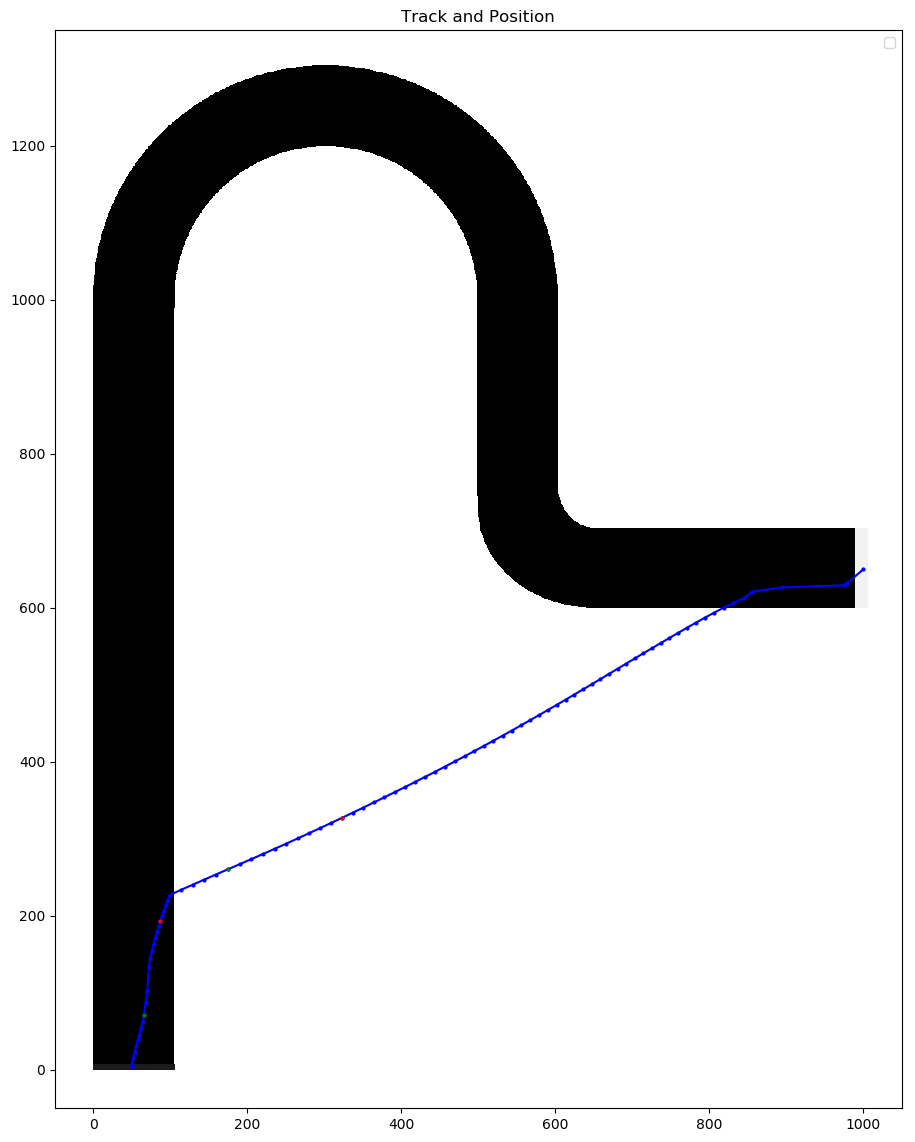

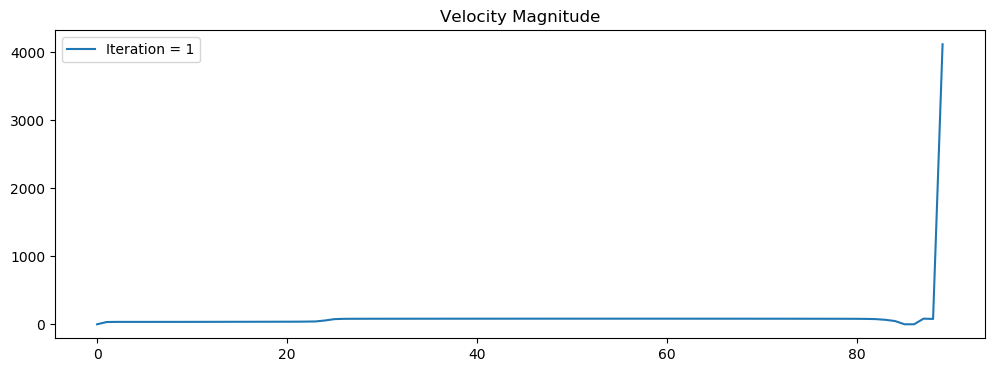

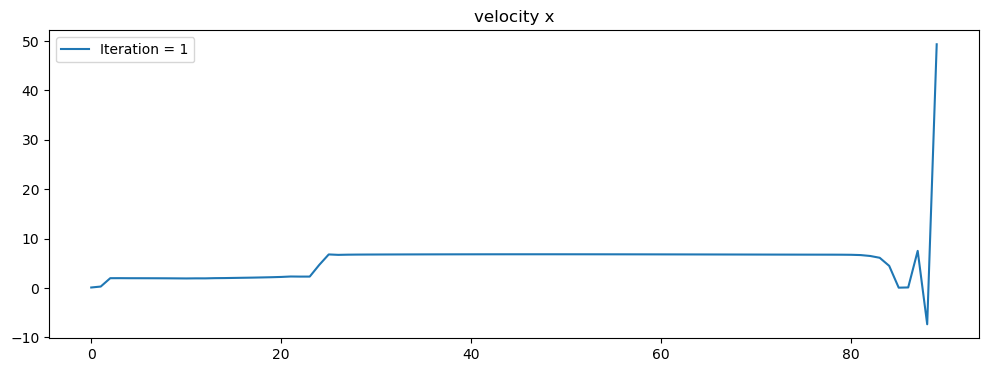

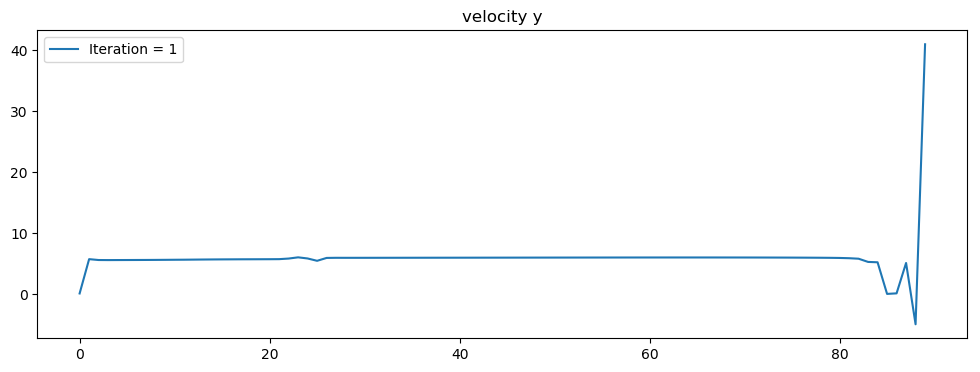

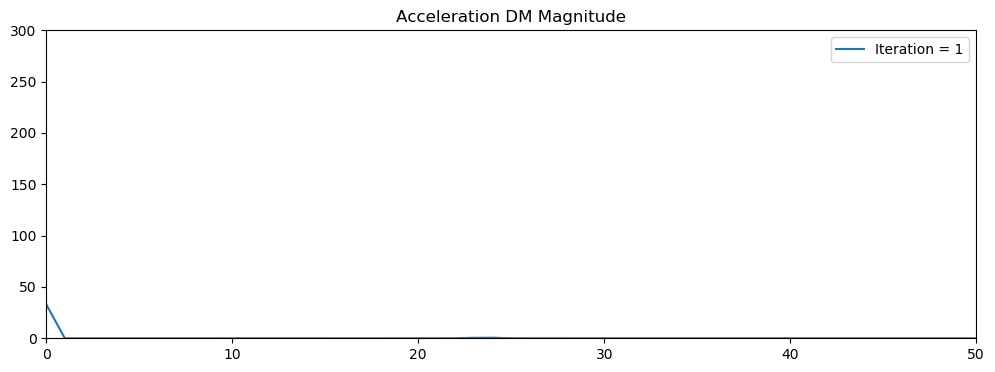

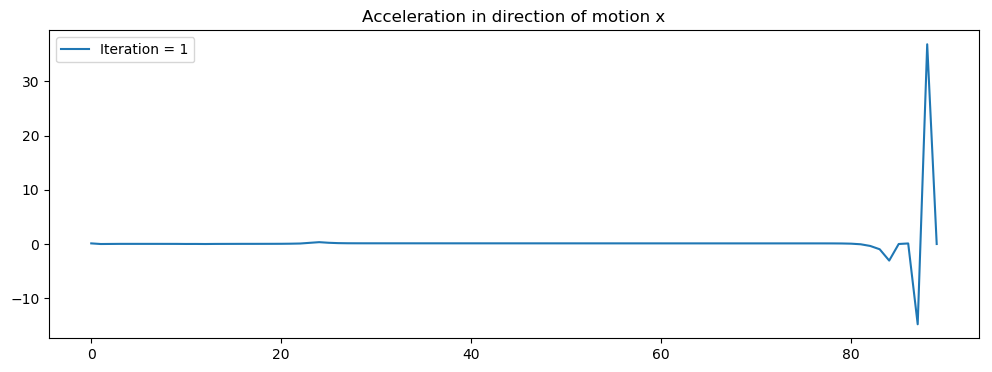

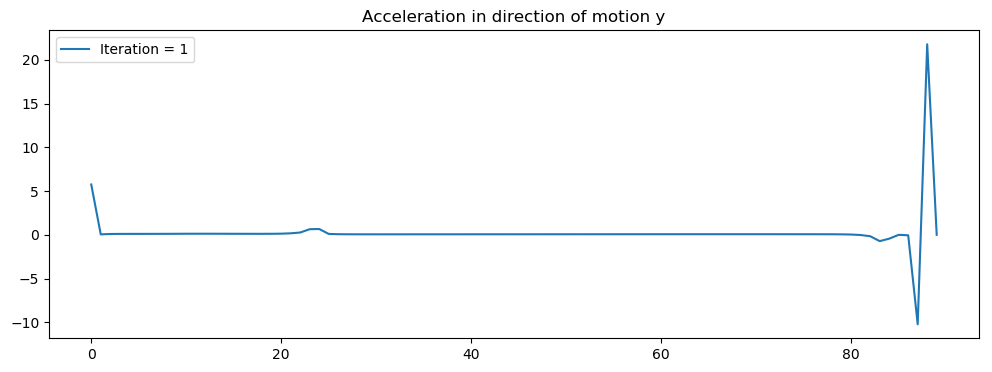

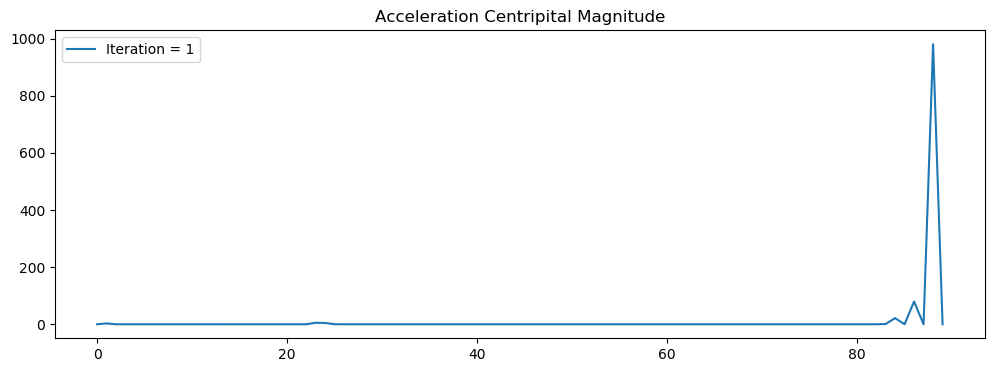

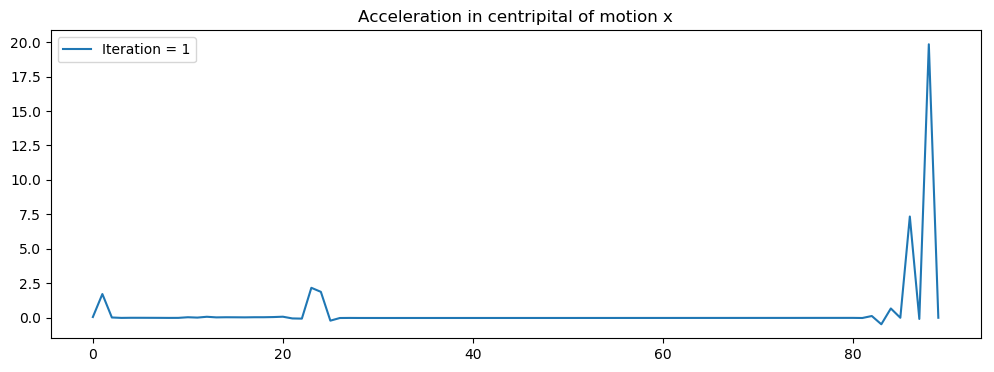

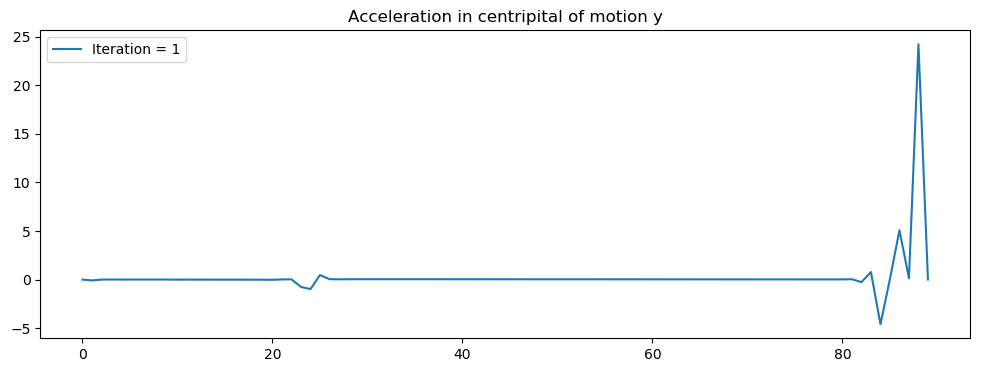

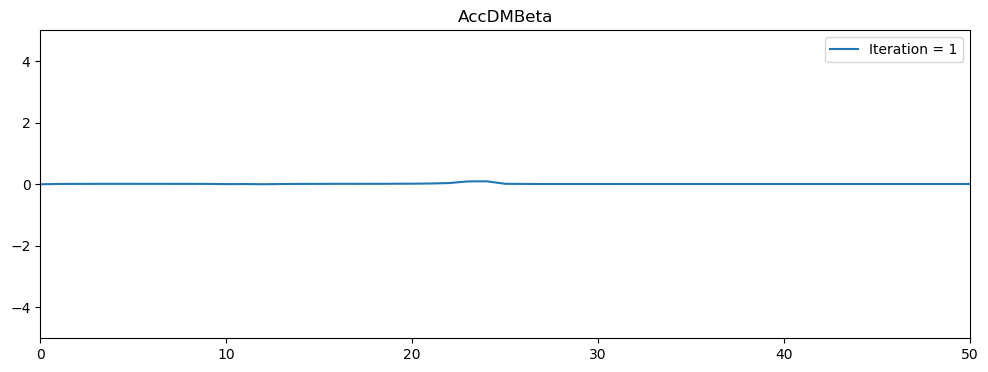

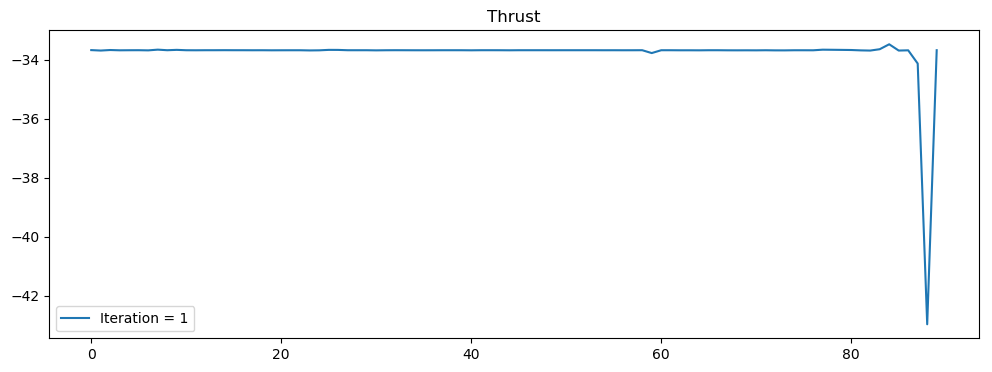

PyObject <matplotlib.legend.Legend object at 0x1322f6fd0>

In [33]:
using Gurobi, Cbc, Mosek, PyPlot, JuMP, Ipopt


# raw = readcsv("Book3.csv");
# # print(raw[3,4])
# trackx = length(raw[:,1])
# tracky = length(raw[1,:])


##track specs
starttrack = 28
finishtrack = 242
maintrack = 0
backgroundtrack = 255


## Tyre specs
coflo = 0.2 #coeffecient of friction longitudnal(in direction of motion)
cofla = 0.4 #coeffecient of friction lattitudnal(perpendicular to direction of motion of the front tyers when they turn)


## formula one car specs all specs in meters and seconds
# mass = 1000 # in kg
g = 9.8  # gravitational pull in m/sec^2
maxacc = 14.2 # max acc in m/sec^2
maxv = 103.55 # max velocity in m/sec equivalent to 200km/hr
maxTu = 1.27 #max steer one side

    
## Start ad Finish constraints
kstart =90 #28 optimal
extrak = 3 #probable extra time seconds
startPos = [50,1]
finishPos = [1000, 650]
startVel = [0,0]
finishVel = [0,0]
startAccDM = [0,0]
startAccCent = [0,0]
finishAccDM = [0,0]


function FindPath(CorPos,iterationsSet)
    ##model
    m = Model(solver = IpoptSolver(print_level=0))
    # m = Model(solver = GurobiSolver())
    
    kstarttemp = kstart
    extraktemp = extrak
    for i in 1:iterationsSet
        kstarttemp = kstarttemp*1.1
        extraktemp = extraktemp*1.1
    end
    kiteration = round(Int64,kstarttemp) #28 optimal
    extrakiteration = round(Int64,extraktemp) #
    
    ## Basic variables and their constraints
    @variable(m, P[1:2,1:kiteration])  # resulting position in x,y
    @variable(m, v[1:2,1:kiteration])
    @variable(m, -3.25*maxacc <= Thrust[1:kiteration] <= maxacc)  # thruster input
    @variable(m, AccDM[1:2,1:kiteration])
    @variable(m, AccDMBeta[1:kiteration])
    @variable(m, AccCent[1:2,1:kiteration])
    @constraint(m, P[:,1] .== startPos)
    @constraint(m, v[:,1] .== startVel)
    @constraint(m, AccCent[:,1] .== startAccCent)
    # @constraint(m, AccDM[:,1] .== startAccDM)
    @constraint(m, P[:,kiteration] .== finishPos)
    # @constraint(m, v[:,k] .== finishVel)
    # @constraint(m, AccDM[:,k] .== finishAccDM)
    # @NLexpression(m, finishDistance, sum((P[i,k]-finishPos[i])^2 for i in 1:2))
    @NLexpression(m, AccCentripital, sum((AccCent[1,i]^2)+(AccCent[2,i]^2)-(cofla*g)^2 for i in 1:kiteration))

    
    ## motion constraints
    for t in 1:kiteration
#         @NLconstraint(m, AccDM[1,t]*AccCent[1,t] + AccDM[2,t]*AccCent[2,t] == 0)
#         @constraint(m, (AccCent[1,t]^2)+(AccCent[2,t]^2) <= (cofla*g)^2)
        @NLconstraint(m, (AccCent[1,t]^2)+(AccCent[2,t]^2) <= 1500) # (cofla*g)^2 = 15.3664
        @constraint(m, ((AccDM[1,t]^2)+(AccDM[2,t]^2)) <= (Thrust[t])^2)#- (coflo*g))^2)
        @constraint(m, (v[1,t]^2)+(v[2,t]^2) <= maxv^2)
    end
    for t in 2:kiteration-extrakiteration
        @constraint(m, (AccCent[1,t]^2)+(AccCent[2,t]^2) <= 999999*(((v[1,t]^2)+(v[2,t]^2))+((AccDM[1,t]^2)+(AccDM[2,t]^2)))) #|AccCent| > 0 only if (|v| > 0 || |AccDm| >0)
    end
    for t in 2:kiteration
        @NLconstraint(m, (P[1,t]-P[1,t-1])*AccCent[1,t] + (P[2,t]-P[2,t-1])*AccCent[2,t] == 0)
        @NLconstraint(m, AccDM[1,t] == AccDMBeta[t]*(P[1,t]-P[1,t-1]))
        @NLconstraint(m, AccDM[2,t] == AccDMBeta[t]*(P[2,t]-P[2,t-1]))
    #     @constraint(m, AccDM[1,t]*(P[2,t]-P[2,t-1]) >=  AccDM[2,t]*(P[1,t]-P[1,t-1]))
    #     @constraint(m, AccDM[1,t]*(P[2,t]-P[2,t-1]) <=  AccDM[2,t]*(P[1,t]-P[1,t-1]))
    end
    @constraint(m, AccDM[2,1] >= 0)
    @constraint(m, AccDM[1,1] >= 0)
    @constraint(m, AccDM[1,1] <= 0)
    for t in 1:kiteration-1    
        @constraint(m, v[1,t+1] == v[1,t] + AccDM[1,t]  + AccCent[1,t])
        @constraint(m, v[2,t+1] == v[2,t] + AccDM[2,t]  + AccCent[2,t])  
        @constraint(m, P[1,t+1] == P[1,t] + v[1,t] + (.5)*(AccDM[1,t]  + AccCent[1,t])) 
        @constraint(m, P[2,t+1] == P[2,t] + v[2,t] + (.5)*(AccDM[2,t]  + AccCent[2,t]))     
    end

    
    ##minimize time section in first | time and velocity in second (by maximizing scarcity of velocity=0 at the ends)
    #start
    # @variable(m, t1[1:20])
    # for i in 1:20
    #     @constraint(m, sum((P[:,i]-startPos).^2) <= t1[i] )
    #     @constraint(m, sum((P[:,i]-startPos).^2) >= t1[i] )
    # end
    # @NLexpression(m, startPosDis1Norm, sum(t1[i] for i in 1:20))
    
    #finish
    @variable(m, t2[kiteration-extrakiteration:kiteration])
    @variable(m, t2v[kiteration-extrakiteration:kiteration])
    for i in kiteration-extrakiteration:kiteration
        @constraint(m, sum((P[:,i]-finishPos).^2) <= t2[i] )
        @constraint(m, sum((P[:,i]-finishPos).^2) >= t2[i] )
        @constraint(m, sum((v[:,i]-[0,0]).^2) <= t2v[i] )
        @constraint(m, sum((v[:,i]-[0,0]).^2) >= t2v[i] )
    end
    @NLexpression(m, finishPosDis1Norm, sum(t2[i]+t2v[i] for i in kiteration-extrakiteration:kiteration))
    
    #Both
    # @NLexpression(m, maxTimeByScarcity, startPosDis1Norm+finishPosDis1Norm)


    ##extra work
    # for t in 2:k-1
    #     @expression(m, v1, v[:,t+1]-v[:,t])
    #     @constraint(m, ((v1[2]*v[2,t]+v1[1]*v[1,t]))/((v1[1]^2+v[2]^2)*(v[1,t]^2+v[2,t]^2)) <= cos(maxTu))
    # #     @NLconstraint(m, (atan(v[2,t]/v[1,t])-atan(v[2,t+1]/v[1,t+1])) >= -maxTu)
    # end


    ## Track boundaries variables and constraints
    ## old track position respective time constraints
    # @constraint(m, P[2,:] .<=(3/2)*P[1,:] + 1100)
    for t in 1:round(Int64,(25*kiteration)/kstart)
        @constraint(m, P[1,t] >= 0)
        @constraint(m, P[1,t] <= 100)
        @constraint(m, P[2,t] >= 0)
        @constraint(m, P[2,t] <= 1300)
    end
    # for t in 12:13
    #     @constraint(m, P[1,t] >= 0)
    #     @constraint(m, P[1,t] <= 100)
    #     @constraint(m, P[2,t] >= 1000)
    #     @constraint(m, P[2,t] <= 1300)
    # end
    # for t in 15:15
    #     @constraint(m, P[1,t] >= 100)
    #     @constraint(m, P[1,t] <= 1600)
    #     @constraint(m, P[2,t] >= 1000)
    #     @constraint(m, P[2,t] <= 1300)
    # end
    for t in round(Int64,(45*kiteration)/kstart):round(Int64,(40*kiteration)/kstart)
        @constraint(m, P[2,t] >= 1000)
    end
    # # for t in 19:19
    # #     @constraint(m, P[2,t] >= 1200)
    # # end
#     for t in round(Int64,(19*kiteration)/kstart):round(Int64,(22*kiteration)/kstart)
#         @constraint(m, P[1,t] >= 500)
#         @constraint(m, P[1,t] <= 600)
#         @constraint(m, P[2,t] >= 600)
#         @constraint(m, P[2,t] <= 1300)
#     end
#     for t in round(Int64,(23*kiteration)/kstart):kiteration
#         @constraint(m, P[2,t] <= 700)
#         @constraint(m, P[2,t] >= 600)
#     end

    # new csv stuff (mostly helps for smoothing when time increases to reduce centripital force)
    for i in 1:iterationsSet
        temp = round(Int64,CorPos[1,i])
        if temp == 0
            temp = temp+1
        end
        for ksets in temp:round(Int64,temp*1.1)
            setvalue(P[1,ksets], CorPos[2,i]) 
            setvalue(P[2,ksets], CorPos[3,i])  
        end
    end   
    # @constraint(m, raw[getvalue(P[1,1]),getvalue(P[2,1])] >= starttrack)
    # @constraint(m, raw[getvalue(P[1,1]),getvalue(P[2,1])] <= starttrack)
    # for t in 2:k-1
    #     @constraint(m, raw[getvalue(P[1,t]),getvalue(P[2,t])] <= backgroundtrack-1)
    # end
    # @constraint(m, raw[getvalue(P[1,k]),getvalue(P[2,k])] >= finishtrack)
    # @constraint(m, raw[getvalue(P[1,k]),getvalue(P[2,k])] <= finishtrack)
    

    ## Objective function
    # @NLobjective(m, Min, finishDistance)
    # @NLobjective(m, Min, AccCentripital)
    # @NLobjective(m, Min, maxTimeByScarcity)
    # @NLobjective(m, Min, finishPosDis1Norm)
    @NLobjective(m, Min, AccCentripital + finishPosDis1Norm)
    solve(m)
    
    
    ##function return stuff
    positions = getvalue(P)
    thrust = getvalue(Thrust)
    vel = getvalue(v)
    accDM = getvalue(AccDM)
    accCent= getvalue(AccCent)
    accDMBeta= getvalue(AccDMBeta)
    
    return(positions, vel,accDM,accCent,accDMBeta, thrust )
end




using JuMP, Gurobi, PyPlot
raw = readcsv("Book1.csv");
# print(raw[1032,650])
trackx = length(raw[:,1])
tracky = length(raw[1,:])
raw[1,1] = 28
iterations = 1

finalposSize =zeros(iterations) 
finalposSize[1] = kstart
for i in 2:iterations
    finalposSize[i] = finalposSize[i-1]*1.1
end
position = 150*ones(iterations,2,round(Int64, finalposSize[iterations]))
vel = 0*ones(iterations,2,round(Int64, finalposSize[iterations]))
thrust = 0*ones(iterations,round(Int64, finalposSize[iterations]))
accDM = 0*ones(iterations,2,round(Int64, finalposSize[iterations]))
accCent = 0*ones(iterations,2,round(Int64, finalposSize[iterations]))
accDMBeta = 0*ones(iterations,round(Int64, finalposSize[iterations]))

blankpos = [3;50;100]
(position[1,:,1:round(Int64,finalposSize[1])], 
    vel[1,:,1:round(Int64,finalposSize[1])], 
        accDM[1,:,1:round(Int64,finalposSize[1])], 
            accCent[1,:,1:round(Int64,finalposSize[1])],
                accDMBeta[1,1:round(Int64,finalposSize[1])],
                    thrust[1,1:round(Int64,finalposSize[1])]) = FindPath(blankpos,0)

for iteration = 2:iterations
    println("I am 1")
    posCounter = 0
    println("iteration:", iteration)
    for w in 1:length(position[iteration-1,1,:])
        println("I am 1.1 :" ,w)
        tempx = round(Int64, position[iteration-1,1,w])
        tempy = round(Int64, position[iteration-1,2,w])
        if tempx == 0
            tempx = tempx+1
        end
        if tempy == 0
            tempy = tempy+1
        end
        println("raw[",tempx,",",tempy,"] = ",raw[tempx, tempy])
        if raw[tempx, tempy] < 255
            posCounter = posCounter+1
        end
    end
    if posCounter < length(position[iteration-1,1,:])
        println("I am 1.2")
        CorPos = [zeros(posCounter)'; zeros(posCounter)';zeros(posCounter)']
        hits = 1
        for w in 1:length(position[iteration,1,:])
            println("I am 1.3")
            tempx =  round(Int64, position[iteration-1,1,w]) 
            tempy =  round(Int64, position[iteration-1,2,w]) 
            if tempx == 0
                tempx = tempx+1
            end
            if tempy == 0
                tempy = tempy+1
            end
            posNumber = round(Int64, raw[tempx,tempy])
            if posNumber < 255
                CorPos[1,hits] = w
                CorPos[2,hits] = position[iteration-1,1,w]
                CorPos[3,hits] = position[iteration-1,2,w]
                hits = round(Int64, hits + 1)
            end
        end
        println("I am 1.4 :", iteration)
        (position[iteration,:,1:round(Int64,finalposSize[iteration])], 
            vel[iteration,:,1:round(Int64,finalposSize[iteration])], 
                accDM[iteration,:,1:round(Int64,finalposSize[iteration])], 
                    accCent[iteration,:,1:round(Int64,finalposSize[iteration])],
                        accDMBeta[iteration,1:round(Int64,finalposSize[iteration])],
                            thrust[iteration,1:round(Int64,finalposSize[iteration])]) = FindPath(CorPos,iteration-1)
    end
end



## Plotting everything
#Plotting track (Position plots will also go in same figure)
rad = linspace(0,π,100) 
x = 300 + 200*cos.(rad)
y = 1000 + 200*sin.(rad)
x1 = 300 + 300*cos.(rad)
y1 = 1000 + 300*sin.(rad)
x2 = linspace(0,133.33,100)
x3 = linspace(100,233.33,100)
x4 = linspace(233.33,365.66,100)
x5 = linspace(133.33,466.66,100)
x6 = linspace(365.66,500,100)
x7 = linspace(466.66,600,100)
y2 = (3/2)*x2 + 1100
y3 = (3/2)*x3 + 850
y4 = 0*x4 + 1200
y5 = 0*x5 + 1300
y6 = -(3/2)*x6 + 1750
y7 = -(3/2)*x7 + 2000
x8 = linspace(0,0,2)
x9 = linspace(600,600,2)
y8 = linspace(0,1100,2)
y9 = linspace(750,1100,2)
x10 = linspace(500,600,100)
x11 = linspace(600,650,100)
x12 = linspace(600,1000,100)
x13 = linspace(650,1000,100)
y10 = -x10 + 1200
y11 = -x11 + 1350
y12 = 0*x12 + 600
y13 = 0*x13 + 700
Llinex = [0, 0]
Lliney = [0, 1000]
LMlinex = [100,100]
LMliney = [0,1000]
RMlinex = [500, 500]
RMliney = [700,1000]
Rlinex = [600,600]
Rliney = [750,1000]
figure(figsize=(11,14))
title("Track and Position")
#Track
# plot(Llinex[:],Lliney[:], color = "#000000", markersize=4 )
# plot(LMlinex[:],LMliney[:],color = "#000000", markersize=4 )
# plot(RMlinex[:],RMliney[:], color = "#000000", markersize=4 )
# plot(Rlinex[:],Rliney[:], color = "#000000", markersize=4 )
# plot(x2,y2, "g-", markersize=4 )
# plot(x3,y3, "g-", markersize=4 )
# plot(x4,y4, "g-", markersize=4 )
# plot(x5,y5, "g-", markersize=4 )
# plot(x6,y6, "g-", markersize=4 )
# plot(x7,y7, "g-", markersize=4 )
# plot(x8,y8, "g-", markersize=4 )
# plot(x9,y9, "g-", markersize=4 )
# plot(x10,y10, color = "#000000", markersize=4 )
# plot(x11,y11, color = "#000000", markersize=4 )
# plot(x12,y12, color = "#000000", markersize=4 )
# plot(x13,y13, color = "#000000", markersize=4 )
# plot(x,y, color = "#000000", markersize=4 )
# plot(x1,y1, color = "#000000", markersize=4 )
#Position
# for i = 1:iterations
#     plot( position[i,1,1:round(Int64,finalposSize[i])], position[i,2,1:round(Int64,finalposSize[i])],label=string("Iteration = ", i))
# end
plot( position[1,1,:], position[1,2,:], "b.-", markersize=4 )
# # plot( position[2,1,:], position[2,2,:], "g.-", markersize=4 )
# # plot( position[3,1,:], position[3,2,:], "r.-", markersize=4 )
# # plot( position[4,1,:], position[4,2,:], "y.-", markersize=4 )
plot( position[1,1,10], position[1,2,10], "g.", markersize=4 )
plot( position[1,1,20], position[1,2,20], "r.", markersize=4 )
plot( position[1,1,30], position[1,2,30], "g.", markersize=4 )
plot( position[1,1,40], position[1,2,40], "r.", markersize=4 )
# plot( position[1,1,50], position[1,2,50], "g.", markersize=4 )
# plot( position[1,1,60], position[1,2,60], "y.", markersize=4 )
# for j = 1:tracky
#     for i = 1:trackx
# #         if raw[i,j] >=255
# #             raw[i,j] = 400
# #         end
#         if raw[i,j] == 0
#             raw[i,j] = 255
#         end
# #         if raw[i,j] == 28
# #             raw[i,j] = 200
# #         end
#     end
# end

rawNew = transpose(raw)
imshow(rawNew[:,:], cmap ="gray")
legend(loc ="best")
axis((-50,1050,-50,1350));

figure(figsize=(12,4))
title("Velocity Magnitude")
for i = 1:iterations
    plot( (vel[i,1,1:round(Int64,finalposSize[i])].^2)+(vel[i,2,1:round(Int64,finalposSize[i])].^2),label=string("Iteration = ", i))
end
legend(loc ="best")

figure(figsize=(12,4))
title("velocity x")
for i = 1:iterations
    plot( vel[i,1,1:round(Int64,finalposSize[i])],label=string("Iteration = ", i))
end
legend(loc ="best")

figure(figsize=(12,4))
title("velocity y")
for i = 1:iterations
    plot( vel[i,2,1:round(Int64,finalposSize[i])],label=string("Iteration = ", i))
end
legend(loc ="best")

figure(figsize=(12,4))
title("Acceleration DM Magnitude")
for i = 1:iterations
    plot( (accDM[i,1,1:round(Int64,finalposSize[i])].^2)+(accDM[i,2,1:round(Int64,finalposSize[i])].^2),label=string("Iteration = ", i))
end
legend(loc ="best")
axis((0,50,0,300));

figure(figsize=(12,4))
title("Acceleration in direction of motion x")
for i = 1:iterations
    plot( accDM[i,1,1:round(Int64,finalposSize[i])],label=string("Iteration = ", i))
end
legend(loc ="best")

figure(figsize=(12,4))
title("Acceleration in direction of motion y")
for i = 1:iterations
    plot( accDM[i,2,1:round(Int64,finalposSize[i])],label=string("Iteration = ", i))
end
legend(loc ="best")

figure(figsize=(12,4))
title("Acceleration Centripital Magnitude")
for i = 1:iterations
    plot( (accCent[i,1,1:round(Int64,finalposSize[i])].^2)+(accCent[i,2,1:round(Int64,finalposSize[i])].^2),label=string("Iteration = ", i))
end
legend(loc ="best")

figure(figsize=(12,4))
title("Acceleration in centripital of motion x")
for i = 1:iterations
    plot( accCent[i,1,1:round(Int64,finalposSize[i])],label=string("Iteration = ", i))
end
legend(loc ="best")


figure(figsize=(12,4))
title("Acceleration in centripital of motion y")
for i = 1:iterations
    plot( accCent[i,2,1:round(Int64,finalposSize[i])],label=string("Iteration = ", i))
end
legend(loc ="best")

figure(figsize=(12,4))
title("AccDMBeta")
for i = 1:iterations
    plot( accDMBeta[i,1:round(Int64,finalposSize[i])],label=string("Iteration = ", i))
end
legend(loc ="best")
axis((0,50,-5,5));

figure(figsize=(12,4))
title("Thrust")
for i = 1:iterations
    plot( thrust[i,1:round(Int64,finalposSize[i])] ,label=string("Iteration = ", i))
end
legend(loc ="best")